# Optimal Portfolio
This notebook construct 3 different optimal portfolios. The maximum sharpe-ratio portfolio (*simple risk adjusted return*), the maximum calmar-ratio portfolio (*maximum drawdown adjusted return*) and the minimum variance portfolio.

\begin{align}
    \text{Sharpe Ratio}&=\frac{R_{p}-R_{f}}{\sigma_{p}}\\
    \text{Calmar Ratio}&=\frac{R_{p}-R_{f}}{\text{Maximum Drawdown}}
\end{align}
where $R_{p}$ denotes the portfolio's annualized return, $R_{f}$ denotes the risk-free interest rate, $\sigma_{p}$ denotes the standard deviation ($\approx$*risk*) of the portfolio and maximum drawdown is measured as the pct.-change from trough to peak, i.e. peak-value minus trough-value divided by peak-value.




In [1]:
############## Loading relevant packages ##############
import numpy as np
import pandas as pd
import datetime as dt
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# local module
import pftools
import VaR_and_ES as vares
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

## Loading and cleaning data
In this notebook, data can be fetched using the downloaded CSV-files or using the yahoo database.

In [2]:
# pick which tickers to use in the analysis.
# Make sure names are compatible with yahoo database or file-name
tickers = ['SXR8', 'XACTC25', 'XDJP', 'LCUA' ,'SXRP', 'SXRL', 'XJSE'] # stock and bonds ETFs
# tickers = ['SXR8', 'XACTC25', 'XDJP', 'LCUA'] # only stock ETFs

# getting data from a local csv-file
df, rdf, cdf = pftools.df_generator(tickers,'csv','C:/Users/olufk/OneDrive/Documents/GitHub/PortfolioDesign/PortfolioDesign/OptimalPF/Data_Investing_com/')

Will eventually output description of each ticker in df


In [3]:
# pick which tickers to use in the analysis.
# Make sure names are compatible with yahoo database or file-name
tickers = ['FORTUM.HE', 'SAF.PA', 'WM','AMD', 'ASML.AS', 'FB', 'SE', '600887.SS', 'SHOP']

# enter time period of interest
start = dt.datetime(2014, 6, 30)
end = dt.datetime(2019, 6, 30)

# getting data from yahoo database
df, rdf, cdf = pftools.df_generator(tickers,'yahoo')

No starttime selected, has therefore chosen default closest to (5 years before today) 2016-09-17
No endtime selected, has therefore chosen default which is the latest trading day as of 2021-09-16
Will eventually output description of each ticker in df


## Describing each tickers
Now that data is loaded, it's time to get an idea of the characteristics of the tickers

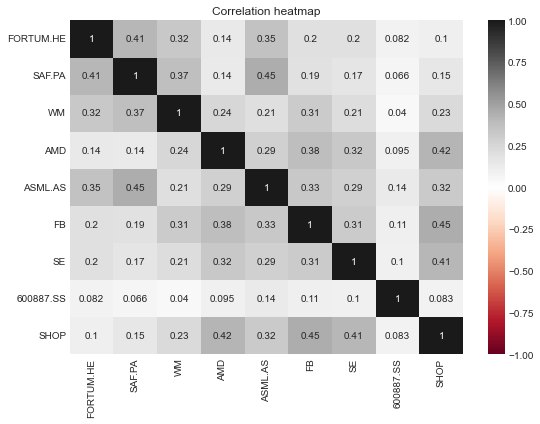

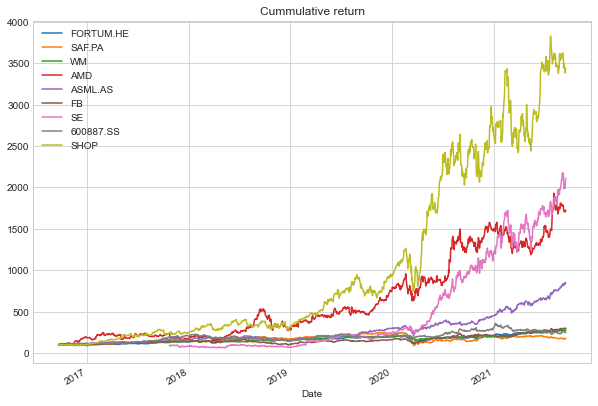

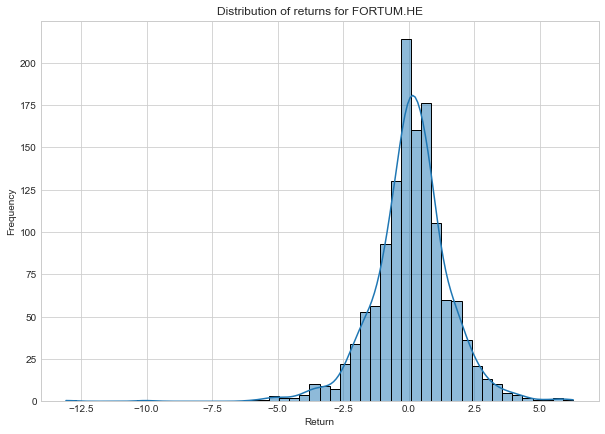

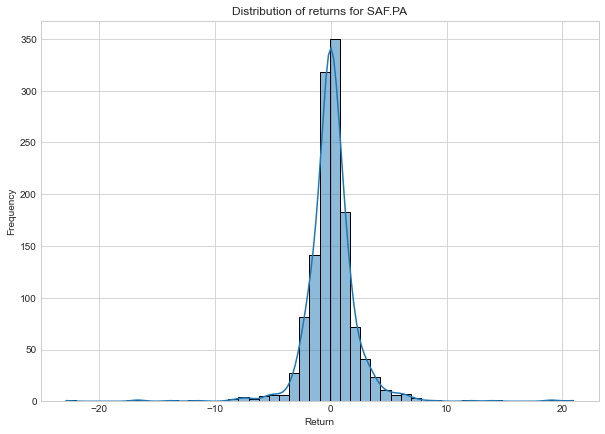

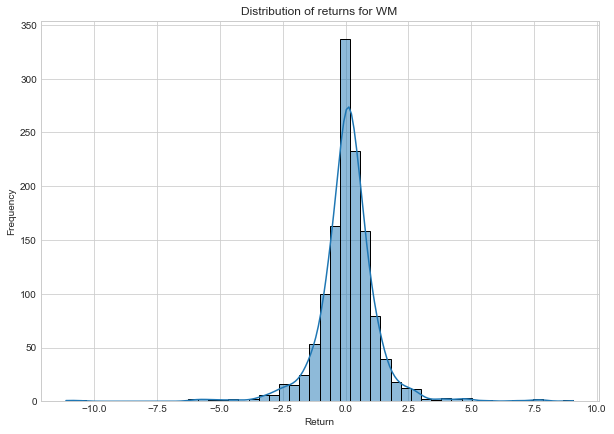

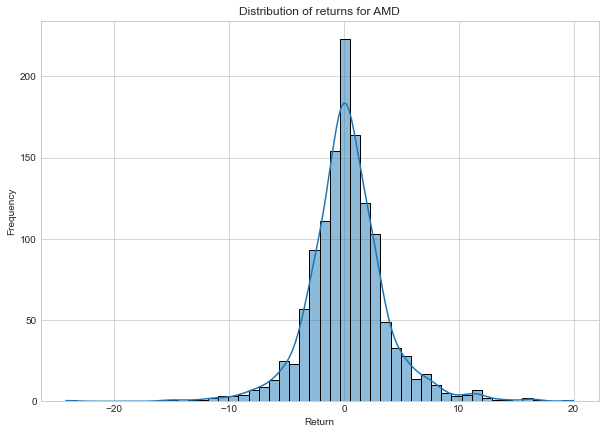

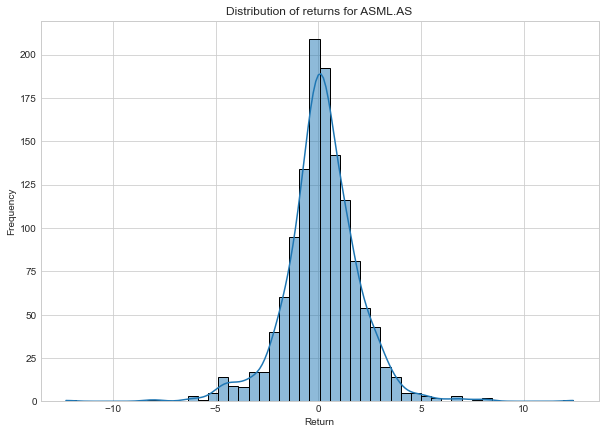

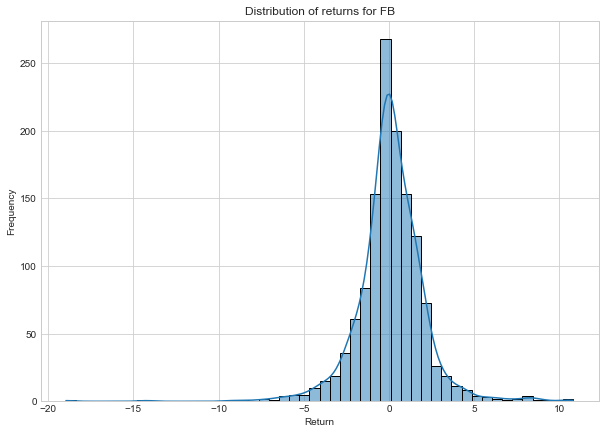

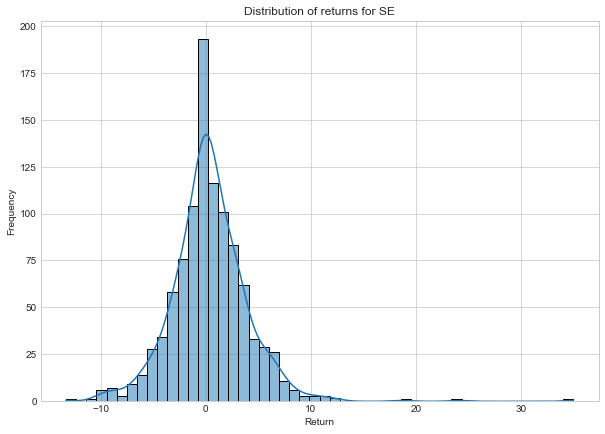

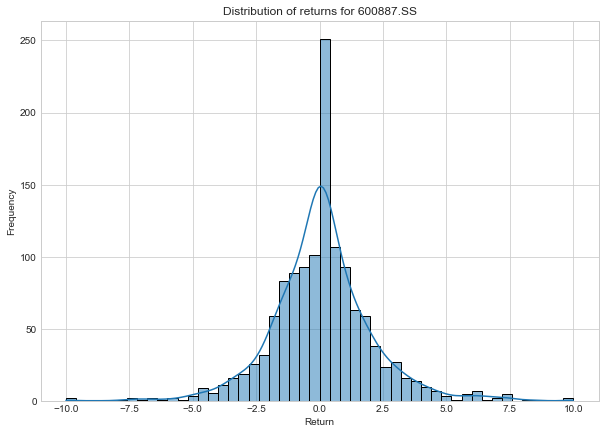

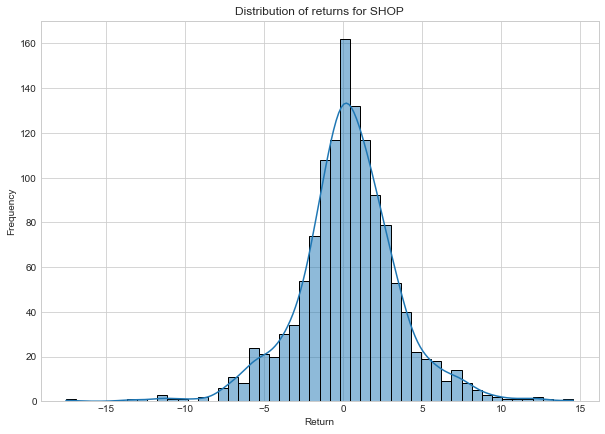

,Annualized return,Volatility,Sharpe ratio,1m max drawdown,Calmar ratio
Ticker,,,,,
FORTUM.HE,24.36,23.58,1.03,40.44,0.60
SAF.PA,11.56,37.04,0.31,62.93,0.18
WM,21.99,20.08,1.10,29.13,0.75
AMD,76.85,55.76,1.38,45.90,1.67
ASML.AS,53.33,28.95,1.84,35.03,1.52
FB,23.76,32.13,0.74,32.53,0.73
SE,118.11,58.21,2.03,27.62,4.28
600887.SS,19.87,32.75,0.61,20.07,0.99
SHOP,103.03,50.53,2.04,39.33,2.62


In [4]:
mu = pftools.desc_ticks(df,rdf,cdf)

In [5]:
omega_hat, alpha_hat, ll = vares.ARCH1_est('SHOP',df)

Estimating SHOP as a ARCH(1)-model resulted in:
--------------------------------------------------------------------------------------
Omega^hat                       --> 8.6860 with std. errors (0.3003) and t-val 28.9246
alpha^hat                       --> 0.1515 with std. errors (0.0264) and t-val 5.7297
Maximized log-likelihood        --> -4280.476
--------------------------------------------------------------------------------------


Risk measures for SHOP at 2 period losses with a 0.05 risk level is
-----------------------------------------
Gauss
-----
VaR                             --> 7.41
ES                              --> 9.29
-----------------------------------------
ARCH(1)
------
VaR (average)                   --> 7.35
ES  (average)                   --> 9.30
-----------------------------------------


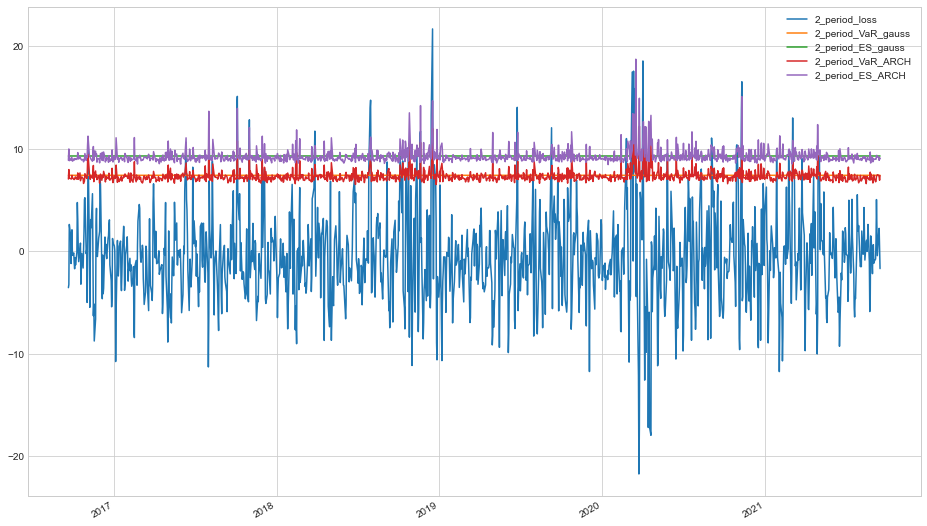

In [6]:
vares_df = vares.VaRES(omega_hat,alpha_hat,df,'SHOP',0.05,2,2000)
vares_df.plot(figsize = (16,10));

In [7]:
pftools.ana_optimal_portfolios(df,rdf,mu)

-----------------------------------------------------------------------------------------------

The analytical solution for the minimum variance portfolio (allows for shorting) resulted in:



,weight
Ticker,
FORTUM.HE,24.02
SAF.PA,-4.55
WM,45.11
AMD,-1.65
ASML.AS,13.67
FB,7.64
SE,-2.67
600887.SS,17.71
SHOP,0.74


With portfolio characteristics:



,stats
Annualized return,24.21
Volatility,15.24
Sharpe ratio,1.59
1m max drawdown,25.60
Calmar ratio,0.95


-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------

The analytical solution for the efficient tangent portfolio (allows for shorting) resulted in:



,weight
Ticker,
FORTUM.HE,20.26
SAF.PA,-27.99
WM,32.10
AMD,5.05
ASML.AS,47.13
FB,-28.78
SE,19.35
600887.SS,7.56
SHOP,25.31


With portfolio characteristics:



,stats
Annualized return,81.37
Volatility,27.94
Sharpe ratio,2.91
1m max drawdown,28.40
Calmar ratio,2.86


-----------------------------------------------------------------------------------------------

Cannot analytically solve the maximum calmar ratio portfolio


In [8]:
import warnings
warnings.filterwarnings('ignore')
smvw, stw, scw = pftools.num_optimal_portfolios(df,mu,50,True)

SHORTING IS ALLOWED
-----------------------------------------------------------------------------------------------
Will numerically solve the minimum variance portfolio
Multistart optimizing - prints every time the optimal solution improves 
-----------------------------------------------------------------------------------------------
Attempt 1 of 50 - minvar portfolio - with w0 (initial guess) = [0.14, -0.85, 0.22, 0.79, 0.09, 0.41, -0.23, 0.3, 0.38]
Weights converged at [0.24, -0.05, 0.45, -0.02, 0.14, 0.08, -0.03, 0.18, 0.01] with variance = 232.30.

Attempt 4 of 50 - minvar portfolio - with w0 (initial guess) = [-0.07, 0.04, -0.88, 0.67, 0.14, 0.02, -0.96, 0.7, 0.95]
Weights converged at [0.24, -0.05, 0.45, -0.02, 0.14, 0.08, -0.03, 0.18, 0.01] with variance = 232.30.

Attempt 20 of 50 - minvar portfolio - with w0 (initial guess) = [-0.63, -0.44, 0.73, 0.6, -0.71, 0.72, -0.8, 0.95, 0.26]
Weights converged at [0.24, -0.05, 0.45, -0.02, 0.14, 0.08, -0.03, 0.18, 0.01] with variance 

,weight
Ticker,
FORTUM.HE,24.02
SAF.PA,-4.55
WM,45.11
AMD,-1.65
ASML.AS,13.67
FB,7.64
SE,-2.67
600887.SS,17.71
SHOP,0.74


With portfolio characteristics:



,stats
Annualized return,24.21
Volatility,15.24
Sharpe ratio,1.59
1m max drawdown,25.60
Calmar ratio,0.95


-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------
Will numerically solve the efficient tangent portfolio
Multistart optimizing - prints every time the optimal solution improves 
-----------------------------------------------------------------------------------------------
Attempt 1 of 50 - tangent portfolio - with w0 (initial guess) = [0.14, -0.85, 0.22, 0.79, 0.09, 0.41, -0.23, 0.3, 0.38]
Weights converged at [0.2, -0.28, 0.32, 0.05, 0.47, -0.29, 0.19, 0.08, 0.25] with Sharpe Ratio = 2.91.

-----------------------------------------------------------------------------------------------

The tangent portfolio from 50 total attempts (multistart) has converged with no notable differences the optimization outcome.
The optimal portfolio ended up being:



,weight
Ticker,
FORTUM.HE,20.26
SAF.PA,-27.99
WM,32.10
AMD,5.05
ASML.AS,47.13
FB,-28.77
SE,19.35
600887.SS,7.56
SHOP,25.31


With portfolio characteristics:



,stats
Annualized return,81.37
Volatility,27.94
Sharpe ratio,2.91
1m max drawdown,28.40
Calmar ratio,2.86


-----------------------------------------------------------------------------------------------
Currently no numerical solution for maximum calmar ratio portfolio with shorting - will therefore be solved for
SHORTING IS NOT ALLOWED
-----------------------------------------------------------------------------------------------
Will numerically solve the calmar portfolio
Multistart optimizing - prints every time the optimal solution improves 
-----------------------------------------------------------------------------------------------
Attempt 1 of 50 - calmar portfolio - with w0 (initial guess) = [0.62, 0.8, 0.55, 0.62, 0.67, 0.8, 0.46, 0.74, 0.52]
Weights converged at [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0] with Calmar Ratio = 4.28.

-----------------------------------------------------------------------------------------------

The calmar portfolio from 50 total attempts (multistart) has converged with no notable differences the optimization outcome.
The optimal portfolio ended

,weight
Ticker,
FORTUM.HE,0.0
SAF.PA,0.0
WM,0.0
AMD,0.0
ASML.AS,0.0
FB,0.0
SE,100.0
600887.SS,0.0
SHOP,0.0


With portfolio characteristics:



,stats
Annualized return,118.11
Volatility,58.21
Sharpe ratio,2.03
1m max drawdown,27.62
Calmar ratio,4.28


-----------------------------------------------------------------------------------------------


In [9]:
mvw, tw, cw = pftools.num_optimal_portfolios(df,mu,20,False)
warnings.filterwarnings('default')

SHORTING IS NOT ALLOWED
-----------------------------------------------------------------------------------------------
Will numerically solve the minimum variance portfolio
Multistart optimizing - prints every time the optimal solution improves 
-----------------------------------------------------------------------------------------------
Attempt 1 of 20 - minvar portfolio - with w0 (initial guess) = [0.57, 0.08, 0.61, 0.9, 0.54, 0.7, 0.39, 0.65, 0.69]
Weights converged at [0.22, 0.0, 0.43, 0.0, 0.11, 0.06, 0.0, 0.18, 0.0] with variance = 236.95.

Attempt 3 of 20 - minvar portfolio - with w0 (initial guess) = [0.58, 0.89, 0.23, 0.48, 0.86, 0.28, 0.46, 0.13, 0.68]
Weights converged at [0.22, 0.0, 0.43, 0.0, 0.11, 0.06, 0.0, 0.18, 0.0] with variance = 236.95.

-----------------------------------------------------------------------------------------------

The minvar portfolio from 20 total attempts (multistart) has converged with no notable differences the optimization outcome.
The opt

,weight
Ticker,
FORTUM.HE,22.38
SAF.PA,0.00
WM,42.73
AMD,0.00
ASML.AS,10.68
FB,6.44
SE,0.00
600887.SS,17.76
SHOP,0.00


With portfolio characteristics:



,stats
Annualized return,25.61
Volatility,15.39
Sharpe ratio,1.66
1m max drawdown,27.47
Calmar ratio,0.93


-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------
Will numerically solve the efficient tangent portfolio
Multistart optimizing - prints every time the optimal solution improves 
-----------------------------------------------------------------------------------------------
Attempt 1 of 20 - tangent portfolio - with w0 (initial guess) = [0.57, 0.08, 0.61, 0.9, 0.54, 0.7, 0.39, 0.65, 0.69]
Weights converged at [0.09, 0.0, 0.13, 0.03, 0.31, 0.0, 0.17, 0.07, 0.2] with Sharpe Ratio = 2.66.

Attempt 2 of 20 - tangent portfolio - with w0 (initial guess) = [0.72, 0.69, 0.81, 0.28, 0.76, 0.31, 0.44, 0.55, 0.43]
Weights converged at [0.09, 0.0, 0.13, 0.03, 0.31, 0.0, 0.17, 0.07, 0.21] with Sharpe Ratio = 2.66.

Attempt 3 of 20 - tangent portfolio - with w0 (initial guess) = [0.58, 0.89, 0.23, 0.48, 0.86, 0.28, 0.46, 0.13, 0.68]
Weights converged at [0.09, 

,weight
Ticker,
FORTUM.HE,9.06
SAF.PA,0.00
WM,12.54
AMD,3.19
ASML.AS,30.65
FB,0.00
SE,17.48
600887.SS,6.55
SHOP,20.52


With portfolio characteristics:



,stats
Annualized return,66.86
Volatility,25.13
Sharpe ratio,2.66
1m max drawdown,34.00
Calmar ratio,1.97


-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------
Will numerically solve the calmar portfolio
Multistart optimizing - prints every time the optimal solution improves 
-----------------------------------------------------------------------------------------------
Attempt 1 of 20 - calmar portfolio - with w0 (initial guess) = [0.57, 0.08, 0.61, 0.9, 0.54, 0.7, 0.39, 0.65, 0.69]
Weights converged at [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0] with Calmar Ratio = 4.28.

Attempt 2 of 20 - calmar portfolio - with w0 (initial guess) = [0.72, 0.69, 0.81, 0.28, 0.76, 0.31, 0.44, 0.55, 0.43]
Weights converged at [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0] with Calmar Ratio = 4.28.

-----------------------------------------------------------------------------------------------

The calmar portfolio from 20 total attempts (multistart) has converged with 

,weight
Ticker,
FORTUM.HE,0.0
SAF.PA,0.0
WM,0.0
AMD,0.0
ASML.AS,0.0
FB,0.0
SE,100.0
600887.SS,0.0
SHOP,0.0


With portfolio characteristics:



,stats
Annualized return,118.11
Volatility,58.21
Sharpe ratio,2.03
1m max drawdown,27.62
Calmar ratio,4.28


-----------------------------------------------------------------------------------------------
